In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("datasets/audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


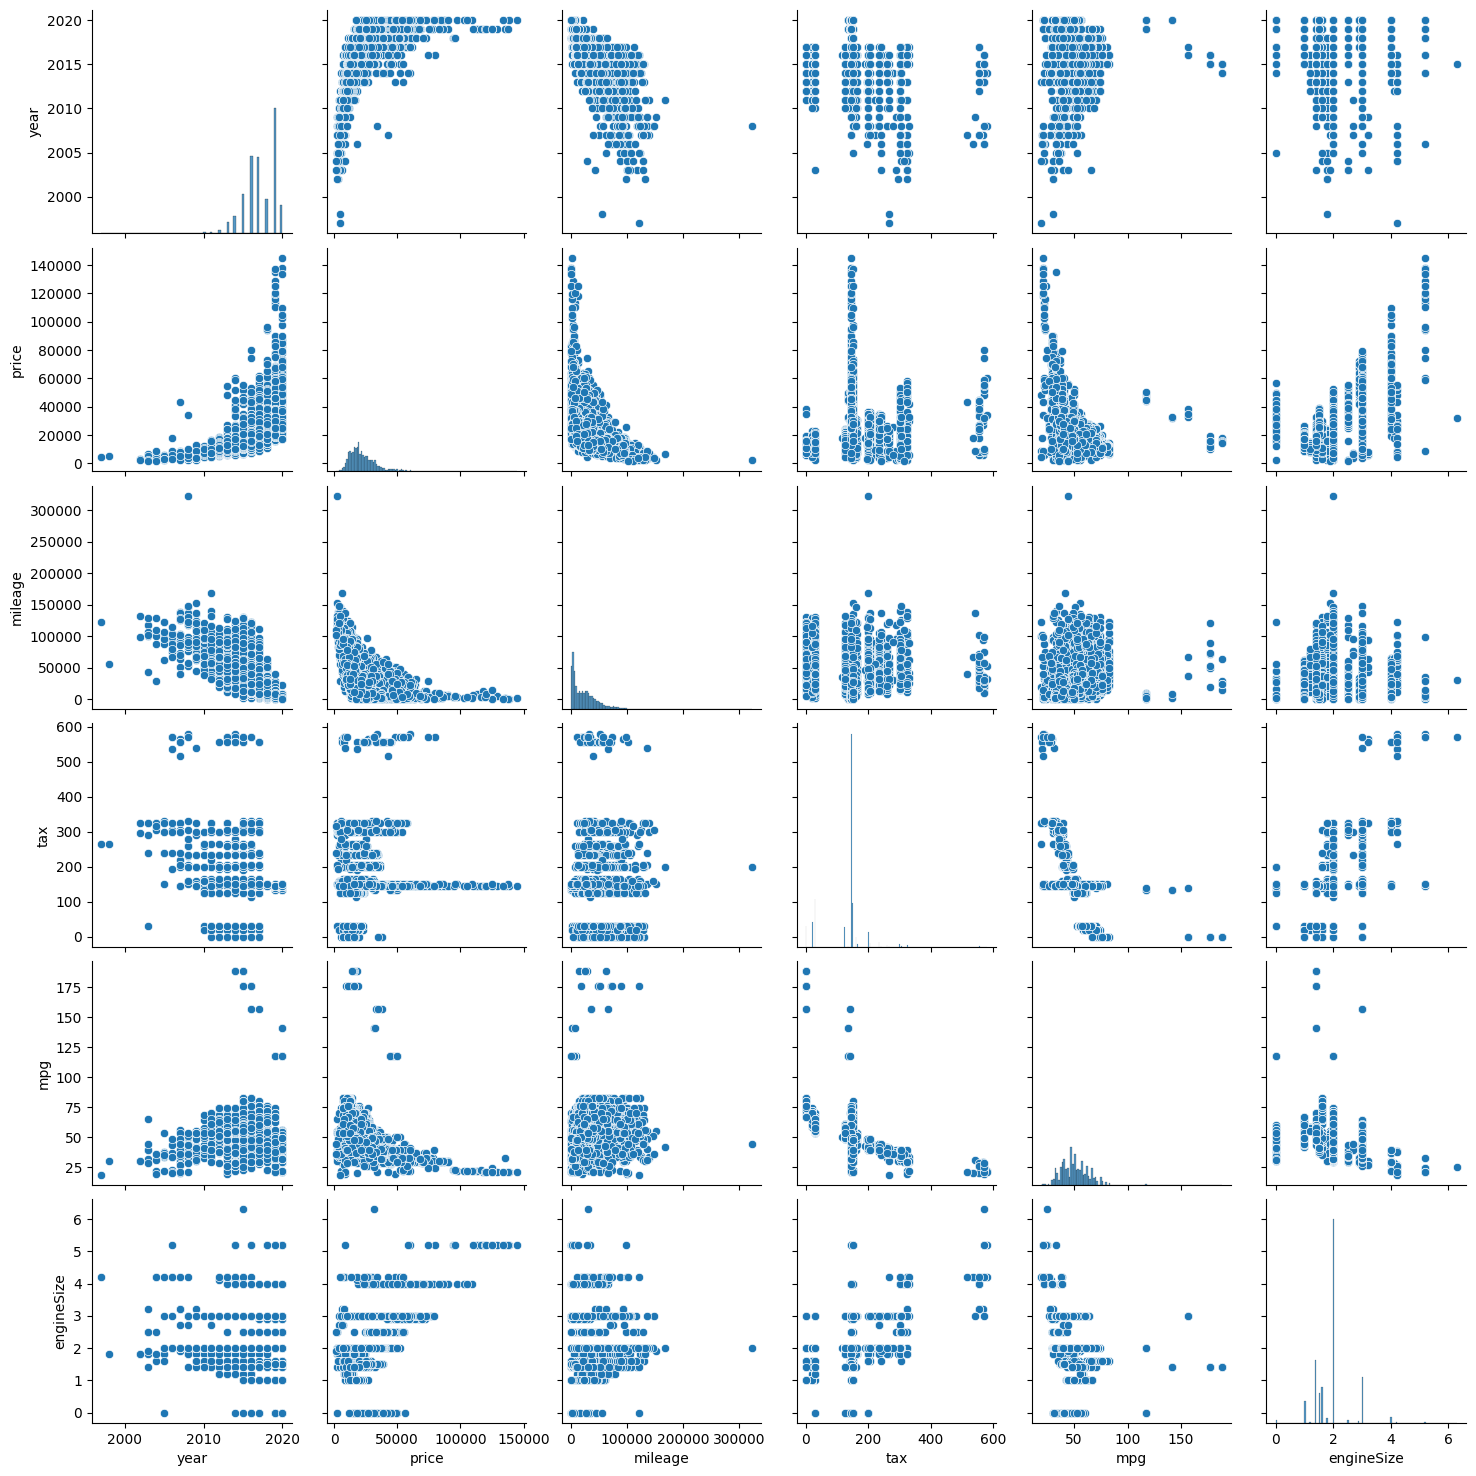

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
df['transmission'].value_counts()

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

In [6]:
df['fuelType'].value_counts()

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

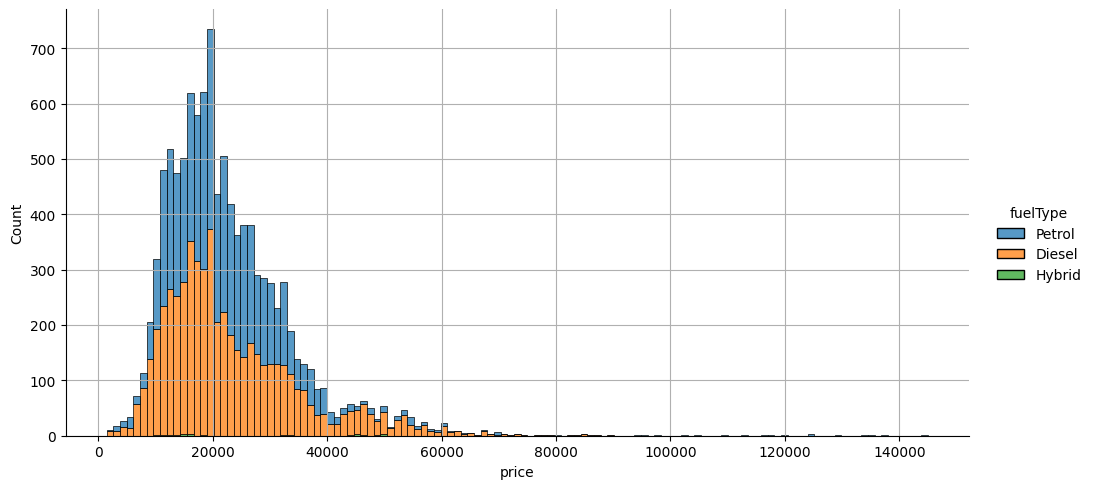

In [10]:
plt.figure(figsize=(8,6))
sns.displot(df,x=df['price'],hue='fuelType',aspect=2,multiple='stack')
plt.grid()
plt.show()

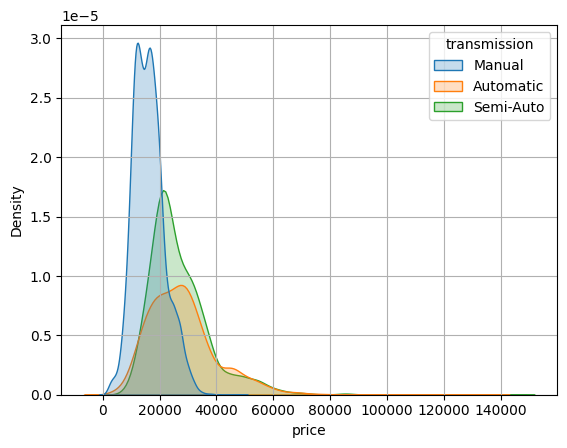

In [8]:
sns.kdeplot(df,x='price',hue='transmission',shade=1)
plt.grid(0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

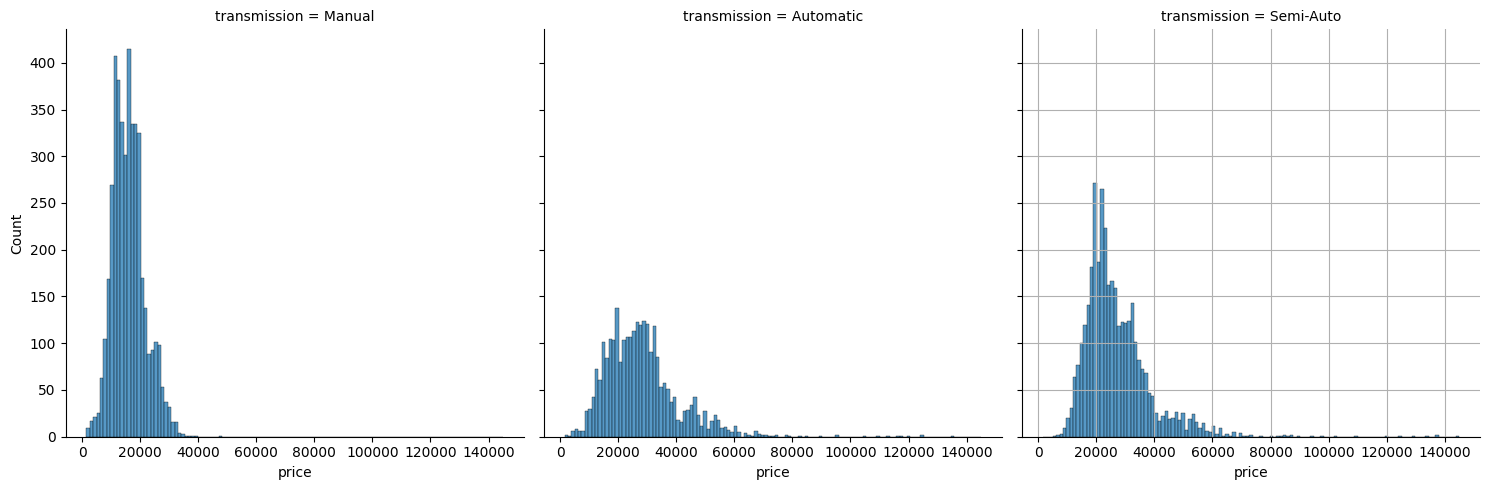

In [9]:
plt.figure(figsize=(12,8))
sns.displot(df,x=df['price'],col='transmission',aspect=1,multiple='stack')
plt.grid()
plt.show()

In [20]:
df['transmission'] = df['transmission'].map({"Manual":0,"Semi-Auto":1,"Automatic":2})
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,2,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,0,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,2,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,0,1998,Petrol,145,49.6,1.0


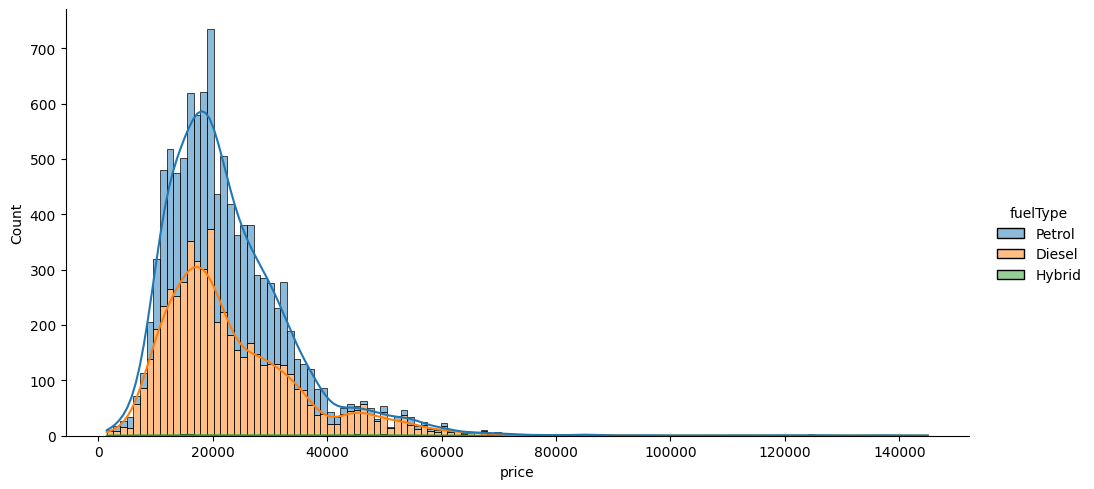

In [12]:
sns.displot(df,x='price',kde=True,aspect=2,hue='fuelType',multiple='stack')
plt.show()

In [21]:
df['fuelType'] = df['fuelType'].map({"Diesel":1,"Petrol":2,"Hybrid":0})
df.sample()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4577,A4,2020,32500,1,3999,1,145,49.6,2.0


In [15]:
df['price'].corr(df['fuelType'])

-0.036633266470806544

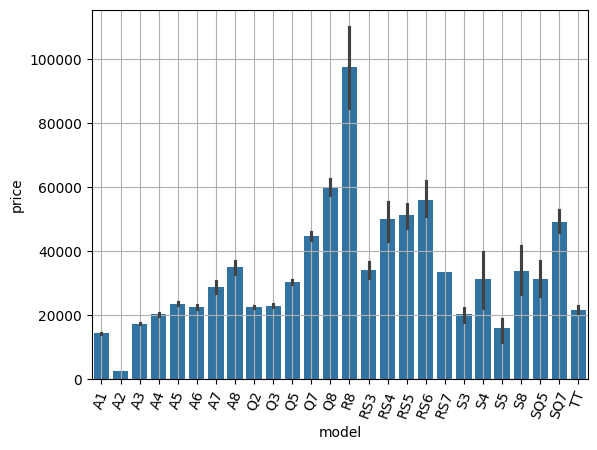

In [16]:
sns.barplot(data=df,x=df['model'].sort_index(),y=df['price'],order=df['model'].sort_values())
plt.xticks(rotation=70)
plt.grid(1)
plt.show()

In [22]:
ord = OrdinalEncoder()
df['model'] = ord.fit_transform(df[['model']])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,2017,12500,0,15735,2,150,55.4,1.4
1,5.0,2016,16500,2,36203,1,20,64.2,2.0
2,0.0,2016,11000,0,29946,2,30,55.4,1.4
3,3.0,2017,16800,2,25952,1,145,67.3,2.0
4,2.0,2019,17300,0,1998,2,145,49.6,1.0


In [23]:
df['model'].corr(df['price'])

0.39463546915381137

In [25]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5663,10.0,2019,33500,1,8566,1,145,38.2,2.0
5807,2.0,2018,18450,0,10500,2,150,60.1,1.0
2538,2.0,2014,13995,0,62049,1,20,68.9,2.0
3063,3.0,2018,17782,0,13166,2,145,52.3,1.4
9466,8.0,2019,30990,2,10,2,145,33.2,2.0


In [26]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.056775,0.394635,0.180233,-0.068694,-0.048901,0.393301,-0.408770,0.369126
year,0.056775,1.000000,0.592581,0.227061,-0.789667,0.119869,0.093066,-0.351281,-0.031582
price,0.394635,0.592581,1.000000,0.441052,-0.535357,-0.036633,0.356157,-0.600334,0.591262
transmission,0.180233,0.227061,0.441052,1.000000,-0.180980,-0.104144,0.330969,-0.348615,0.385790
mileage,-0.068694,-0.789667,-0.535357,-0.180980,1.000000,-0.239618,-0.166547,0.395103,0.070710
fuelType,-0.048901,0.119869,-0.036633,-0.104144,-0.239618,1.000000,0.106313,-0.357648,-0.363532
tax,0.393301,0.093066,0.356157,0.330969,-0.166547,0.106313,1.000000,-0.635909,0.393075
mpg,-0.408770,-0.351281,-0.600334,-0.348615,0.395103,-0.357648,-0.635909,1.000000,-0.365621
engineSize,0.369126,-0.031582,0.591262,0.385790,0.070710,-0.363532,0.393075,-0.365621,1.000000


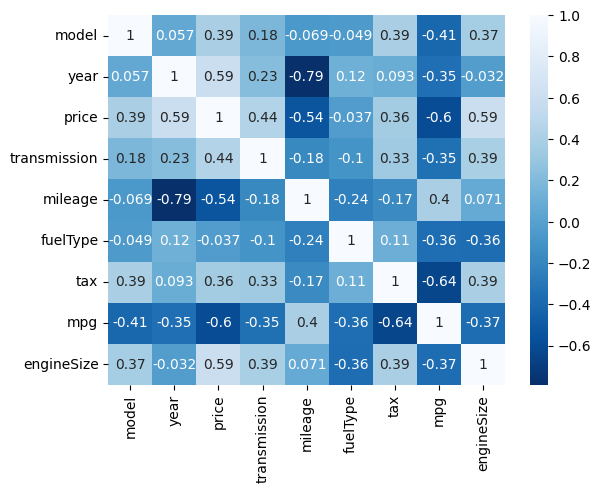

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')
plt.show()

In [28]:
x_data = df.drop('price',axis=1)
y_data = df['price']

In [29]:
print(x_data.shape)
print(y_data.shape)

(10668, 8)
(10668,)


In [30]:
standart = StandardScaler()
x_data = standart.fit_transform(x_data)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [32]:
print("TRAIN DATA")
print(x_train.shape)
print(y_train.shape)

TRAIN DATA
(8001, 8)
(8001,)


In [33]:
print("TEST DATA")
print(x_test.shape)
print(y_test.shape)

TEST DATA
(2667, 8)
(2667,)


* `LinearRegression`

In [34]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = lin_model.predict(x_test)

In [36]:
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean squared error:  29106514.090874128
Mean absolute error 3384.774737263326
R2 score: 0.800047073973948


In [37]:
result = cross_val_score(lin_model,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.77178596 0.80254093 0.80255552 0.81455468 0.79166454]
Mean Score: 0.7966203266762352
Standard Deviation of Scores: 0.014375162559704877


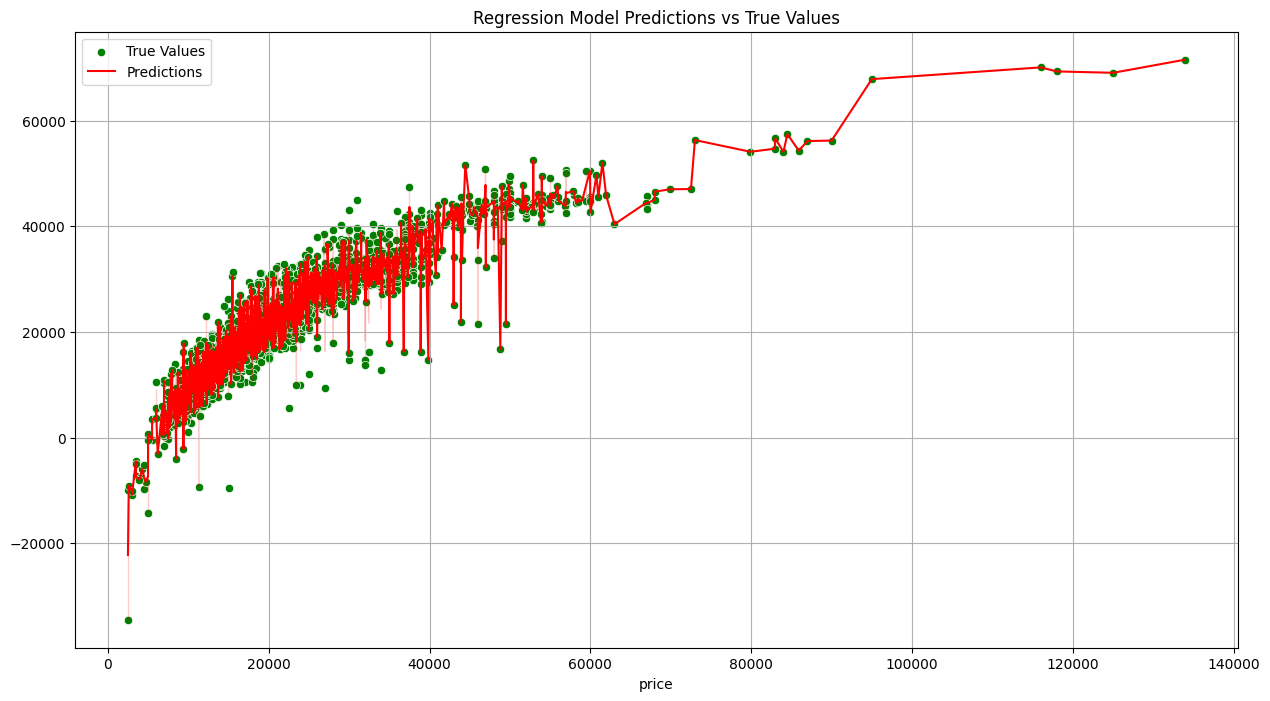

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_test,y=y_pred,color='green',label='True Values')
sns.lineplot(x=y_test,y=y_pred,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `KNN`

In [41]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [42]:
k_predict = knn.predict(x_test)

In [43]:
print('Mean squared error: ',mean_squared_error(y_test,k_predict))
print("Mean absolute error",mean_absolute_error(y_test,k_predict))
print("R2 score:",r2_score(y_test,k_predict))

Mean squared error:  7756188.56167979
Mean absolute error 1823.2670416197975
R2 score: 0.9467173364396831


In [44]:
result = cross_val_score(knn,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.87338463 0.91069211 0.92358295 0.91446308 0.9045095 ]
Mean Score: 0.9053264547254356
Standard Deviation of Scores: 0.01712609523555937


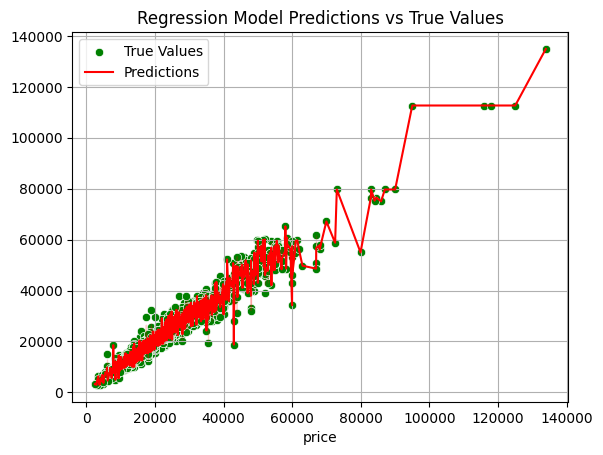

In [46]:
sns.scatterplot(x=y_test,y=k_predict,color='green',label='True Values')
sns.lineplot(x=y_test,y=k_predict,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `DecisionTreeRegressor`

In [47]:
dt = DecisionTreeRegressor(min_samples_leaf=2)
dt.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=2)

In [48]:
dt_predict = dt.predict(x_test)

In [49]:
print('Mean squared error: ',mean_squared_error(y_test,dt_predict))
print("Mean absolute error",mean_absolute_error(y_test,dt_predict))
print("R2 score:",r2_score(y_test,dt_predict))

Mean squared error:  8589014.809367891
Mean absolute error 1915.8187914010748
R2 score: 0.940996072650532


In [50]:
result = cross_val_score(dt,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.86044914 0.92087866 0.92694033 0.91857727 0.92175393]
Mean Score: 0.9097198657192195
Standard Deviation of Scores: 0.02478684836134027


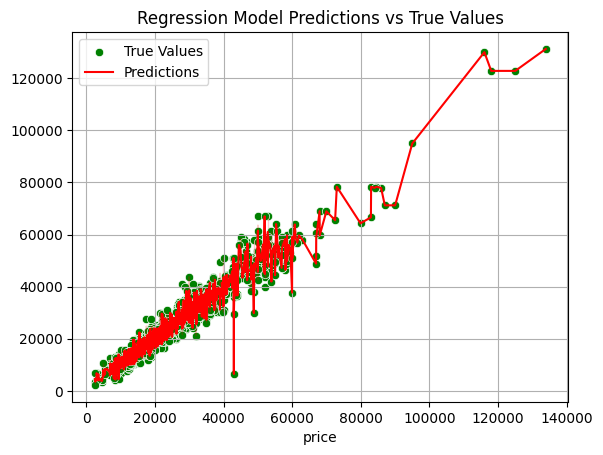

In [51]:
sns.scatterplot(x=y_test,y=dt_predict,color='green',label='True Values')
sns.lineplot(x=y_test,y=dt_predict,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()